## Центральная предельная теорема своими руками

Parametr a = 0.711475930727.Parametr b = 2.78255401119
Mean E = 0.203626168795.Dispersion D = 0.0360839946045


Text(0.5,0,'$x$')

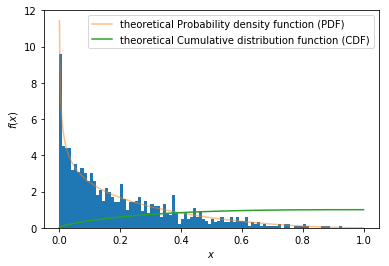

In [261]:
# бета-распределение 

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
# определяю бета-распределение с параметрами a и b, при этом, для эксперимента, параметры выбираю случайным образом 
# из диапазона от 0 до 3, так как величина параметров влияет на форму графиков 
a = np.random.uniform(0., 3.)
b = np.random.uniform(0., 3.)
# вывожу значения параметров, чтобы наблюдать, как они влияют на форму графиков
print("Parametr a = {0}.Parametr b = {1}".format(str(a), str(b)))
beta_rv = sts.beta(a, b) # определяю бета-распределение
sample = beta_rv.rvs(1000)
# теоретическое среднее(мат ожидание) (информация из википедии)
E=a/(a+b)
# теоретическая дисперсия (информация из википедии)
D=a*b/((a+b)**2*(a+b+1))
# вывожу теоретические значения мат. ожидания(E) и дисперсии(D) для текущих параметров а и b
print("Mean E = {0}.Dispersion D = {1}".format(str(E), str(D)))

# строю гистограмму, где число карманов равно 100 
plt.hist(sample, bins =100, range=(0,1), density=True) #normed=True
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

# строю поверх гистограммы теоретическую плотность распределения случайной величины и график функции распределения, 
# определив массив точек для построения плотности распределения
x = np.linspace(0,1,1000) 
# вычисляю значения плотности распределения от выборки
pdf = beta_rv.pdf(x) 
plt.plot(x, pdf, label='theoretical Probability density function (PDF)', alpha=0.5) # Плотность вероятности
cdf = beta_rv.cdf(x)
plt.plot(x, cdf, label='theoretical Cumulative distribution function (CDF)')# Функция распределения
plt.legend(loc='best')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')


Text(0.5,0,'$x$')

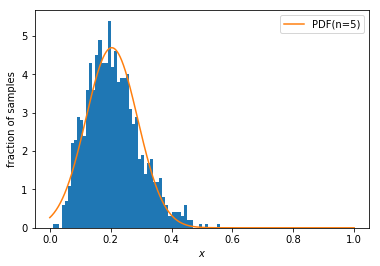

In [262]:
# Оцениваю распределение выборочного среднего при при n=5:


n=5
v_sred=[] # массив выборочных средних

for i in range(1000):
    sample = beta_rv.rvs(n)
    v_sred_i=sum(sample)/n
    v_sred.append(v_sred_i)

# среднеквадратическое отклонение нормального распределения, которым, 
# согласно центральной предельной теореме, можно аппроксимировать распределение среднего
sigma5=math.sqrt(D/n)
# нормальное рапределение с расчетными характеристиками
norm5 = sts.norm(E, sigma5)
# плотность нормального распределения при объеме выборки 5
pdf5 = norm5.pdf(x)
# гистограмма и график плотности нормального распределения
plt.hist(v_sred, bins =100, range=(0,1), density=True) 
plt.plot(x, pdf5, label='PDF(n=5)')
plt.ylabel('fraction of samples')
plt.legend(loc='best')
plt.xlabel('$x$')


Text(0.5,0,'$x$')

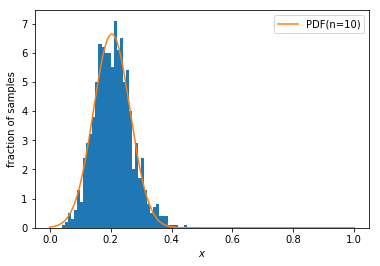

In [263]:
# Оцениваю распределение выборочного среднего при при n=10:


n=10
v_sred=[] # массив выборочных средних

for i in range(1000):
    sample = beta_rv.rvs(n)
    v_sred_i=sum(sample)/n
    v_sred.append(v_sred_i)

# среднеквадратическое отклонение нормального распределения, которым, 
# согласно центральной предельной теореме, можно аппроксимировать распределение среднего
sigma10=math.sqrt(D/n)
# нормальное рапределение с расчетными характеристиками
norm10 = sts.norm(E, sigma10)
# плотность нормального распределения при объеме выборки 10
pdf10 = norm10.pdf(x)
# гистограмма и график плотности нормального распределения
plt.hist(v_sred, bins =100, range=(0,1), density=True) 
plt.plot(x, pdf10, label='PDF(n=10)')
plt.ylabel('fraction of samples')
plt.legend(loc='best')
plt.xlabel('$x$')


Text(0.5,0,'$x$')

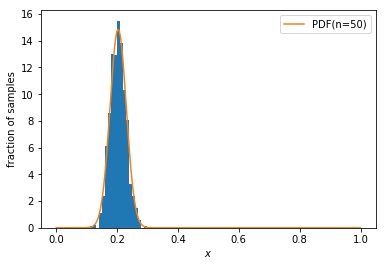

In [264]:
# Оцениваю распределение выборочного среднего при при n=50:


n=50
v_sred=[] # массив выборочных средних

for i in range(1000):
    sample = beta_rv.rvs(n)
    v_sred_i=sum(sample)/n
    v_sred.append(v_sred_i)

# среднеквадратическое отклонение нормального распределения, которым, 
# согласно центральной предельной теореме, можно аппроксимировать распределение среднего
sigma50=math.sqrt(D/n)
# нормальное рапределение с расчетными характеристиками
norm50 = sts.norm(E, sigma50)
# плотность нормального распределения при объеме выборки 50
pdf50 = norm50.pdf(x)
# гистограмма и график плотности нормального распределения
plt.hist(v_sred, bins =100, range=(0,1), density=True) 
plt.plot(x, pdf50, label='PDF(n=50)')
plt.ylabel('fraction of samples')
plt.legend(loc='best')
plt.xlabel('$x$')

## Выводы
В ходе работы изучалось распределение выборочного среднего случайной величины при разных объёмах выборки. В качестве непрерывного распределения было выбрано бета-распределение, так как в зависимости от его входных параметров a и b, график функции распределния и плотности вероятности принимает различные формы. Для этого параметры а и b определялись случайным образом на диапазоне от 0 до 3. 

По полученным графикам с увеличением объема выборки от 5 до 50 наблюдается увелечение точности апроксимации выборочного среднего значения непрерывной случайной величины описываемой бета-распределением при всех значениях параметров. При n=50 апроксимация призводится уже достаточно точно.